# New Apprentice Python Project 
**Using the appleAppData data set found on Kaggle! https://www.kaggle.com/datasets/gauthamp10/apple-appstore-apps** 

```python
Business Questions :
1. What is the average rating of the FREE and NON-FREE apps
2. What are the average ratings of common genres (gaming, business, navigation, etc)?
3. What is the average, minimum and max price of gaming apps?
```


##### Importing Libraries, Opening the dataset and cleaning it


In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

df = pd.read_csv('appleAppData.csv')
df_main = df.dropna()

Showing the dataset information and displaying a small table of the data

In [ ]:
df_main.info()

df_main.head(5)

Creating a app rating function to call later in the code

In [15]:
def app_ratings():
    global free_apps, paid_apps
    free_apps = []
    paid_apps = []

    for index, row in df_main.iterrows():
        if row[17] > 0:
            rating = row[17]
            free_checker = row[12]
            if free_checker == True:
                free_apps.append(rating)
            else: 
                paid_apps.append(rating)


# **Finding the average rating of free apps and non free apps!**


[Text(0, 0, '4.124'), Text(0, 0, '3.8252')]

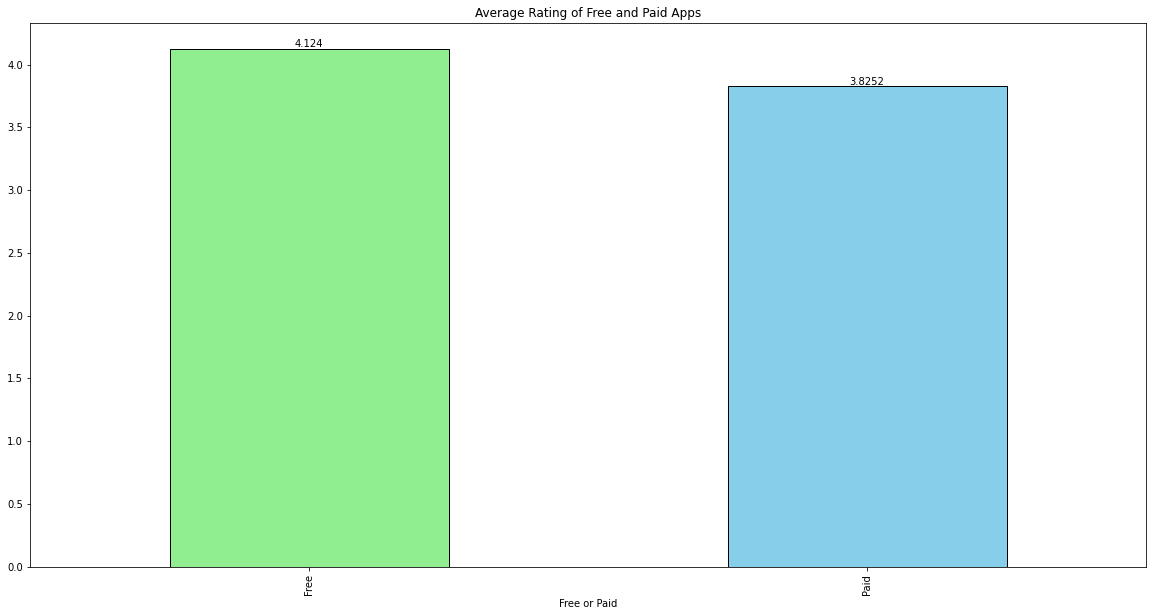

In [16]:
           
## Create a function to find the average of ratings and return that value
def average_for_lists(sum_list, len_list):
    average = round(sum_list / len_list, 4)
    return average


app_ratings() ##Calling my loop function to find the ratings from free and paid apps

free_paid_graph_dict = {'Free or Paid': ['Free', 'Paid'],
                    'Average Rating':[average_for_lists(sum(free_apps), len(free_apps)), average_for_lists(sum(paid_apps), len(paid_apps))]}

free_paid_df = pd.DataFrame(free_paid_graph_dict)

## Graphing the dataframe
matplotlib.style.use('default')
matplotlib.rcParams['font.size'] = 15
free_paid_graph = free_paid_df.plot(figsize = (20, 10),
            color = ['lightgreen', 'skyblue'],
            kind = 'bar',
            legend = False,
            x = 'Free or Paid',
            y = 'Average Rating',
            title = 'Average Rating of Free and Paid Apps',
            edgecolor = 'black')
free_paid_graph.bar_label(free_paid_graph.containers[0]) #shows the value of the bars

# **Average Ratings of Common Genres**

In [ ]:

# Creating list variables to hold iterated data
games_genre_rating = []
business_genre_rating = []
navigation_genre_rating = []
entertainment_genre_rating = []

for row in apps_data[1:]:
    rating = float(row[17])
    genre = row[3]

    if genre == 'Games' and row[17] > '0.0':
        games_genre_rating.append(rating)
    elif genre == 'Business' and row[17] > '0.0':
        business_genre_rating.append(rating)
    elif genre == 'Navigation' and row[17] > '0.0':
        navigation_genre_rating.append(rating)
    elif genre == 'Entertainment' and row[17] > '0.0':
        entertainment_genre_rating.append(rating)

## Creating a graph dictionary to hold the data that I want to display
graph_dict = { 'Genres':['Gaming', 'Business', 'Navigation', 'Entertainment'],
                'Average Rankings':[average_for_lists(sum(games_genre_rating), len(games_genre_rating)), average_for_lists(sum(business_genre_rating), len(business_genre_rating)), average_for_lists(sum(navigation_genre_rating), len(navigation_genre_rating)), average_for_lists(sum(entertainment_genre_rating), len(entertainment_genre_rating))]}

## Creating the DataFrame using the dictionary I created
df = pd.DataFrame(graph_dict)
matplotlib.style.use('dark_background')
matplotlib.rcParams['font.size'] = 15
## Creates a bar graph using the information from the DataFrame
graph = df.plot(figsize = (20, 10), 
            kind = 'bar',
            title = 'Average Ratings of Common Categories',
            legend = False,
            x = 'Genres',
            y = 'Average Rankings',
            color = ['blue', 'red', 'green', 'yellow'],
            edgecolor = 'black')
graph.bar_label(graph.containers[0]) #Graph labels to display the actual average of the genre
graph.set_facecolor('gray')

# Calculating the average price of gaming apps

In [ ]:
price_gaming_apps = []

for row in apps_data[1:]:
    genre = row[3]
    try:
        if float(row[10]) > 0 and genre == 'Games':
            price_gaming_apps.append(float(row[10]))
    except ValueError:
        pass

    
avg_paid_apps = round(sum(price_gaming_apps) / len(price_gaming_apps), 2)
most_expensive_game_app = max(price_gaming_apps)
cheapest_game_app = min(price_gaming_apps)


print("The average price of gaming apps is: " + "$" + str(avg_paid_apps))
print("The most expensive gaming app is: " + "$" + str(most_expensive_game_app))
print("The cheapest gaming app is: " + "$" + str(cheapest_game_app))


## Maybe make a graph showing the max, min and avg price?? I dunno yet